# Problem Statement

We want to understand the factors on which the demand for shared bikes depends. Specifically, to understand the factors affecting the demand for these shared bikes in the American market. The ask here is to know:

- Which variables are significant in predicting the demand for shared bikes. <br>
- How well those variables describe the bike demands

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [2]:
# read the csv file
dataframe = pd.read_csv('day.csv')
dataframe.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Exploratory data analysis 
Once the data is read we will do some EDA on it

## Check if there are any null entries and handle them

In [3]:
# get all the column info to check if there are null entries
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
dataframe.shape

(730, 16)

Analysis : Seems like there are 730 rows and 16 columns none of the column values are null

In [5]:
# let us confirm one more time if there are any null entries
dataframe.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Remove the redundant columns if any

In [6]:
# dropping the redundant columns
dataframe.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [7]:
dataframe.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### Mapping data

In [9]:
# mapping the month column values to respective strings 
dataframe.mnth = dataframe.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [10]:
# mapping the seasons to respective values as per data dictionary
dataframe.season = dataframe.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [11]:
# mapping the weathersit to respective values as per data dictionary
dataframe.weathersit = dataframe.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [12]:
# mapping the weekdays to respective values 
dataframe.weekday = dataframe.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [13]:
dataframe.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Visualizing the data

### $1$. Continuous variables

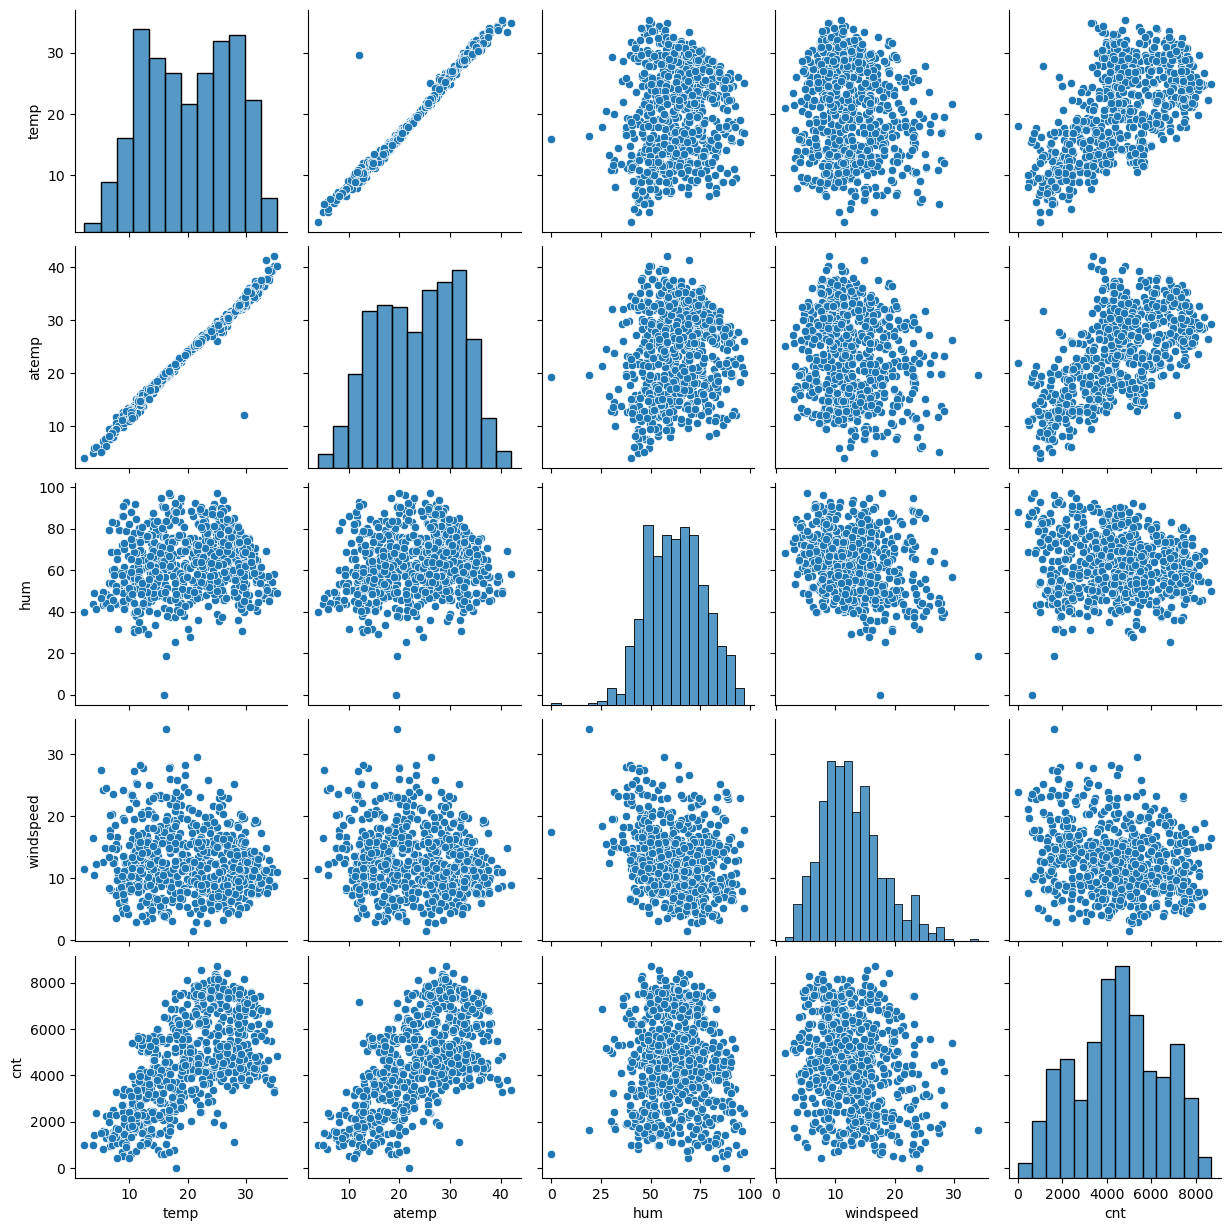

In [14]:
# Pairplots of all the columns having numerical values

sns.pairplot(data=dataframe,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

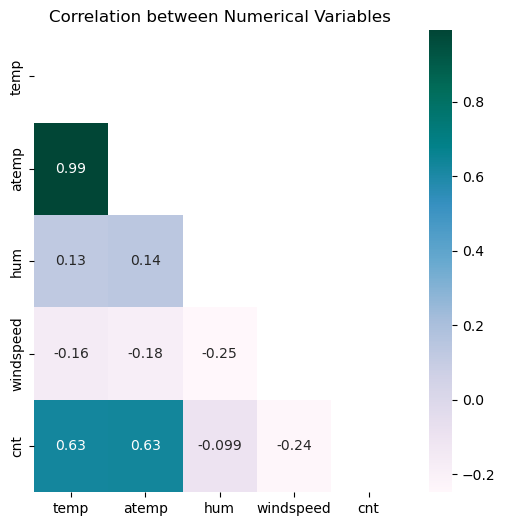

In [15]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(dataframe[['temp','atemp','hum','windspeed','cnt']].corr())
sns.heatmap(dataframe[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True, cmap="PuBuGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

Analysis : 

$1$. There is linear correlation between temp and atemp. Both cannot be used for model analysis due to mutlicolinearity. We will drop one the variable later in the analysis    <br>

$2$. Temp/atemp have a high linear coefficient for the target variable cnt
    

### $2$. Categorical Variables

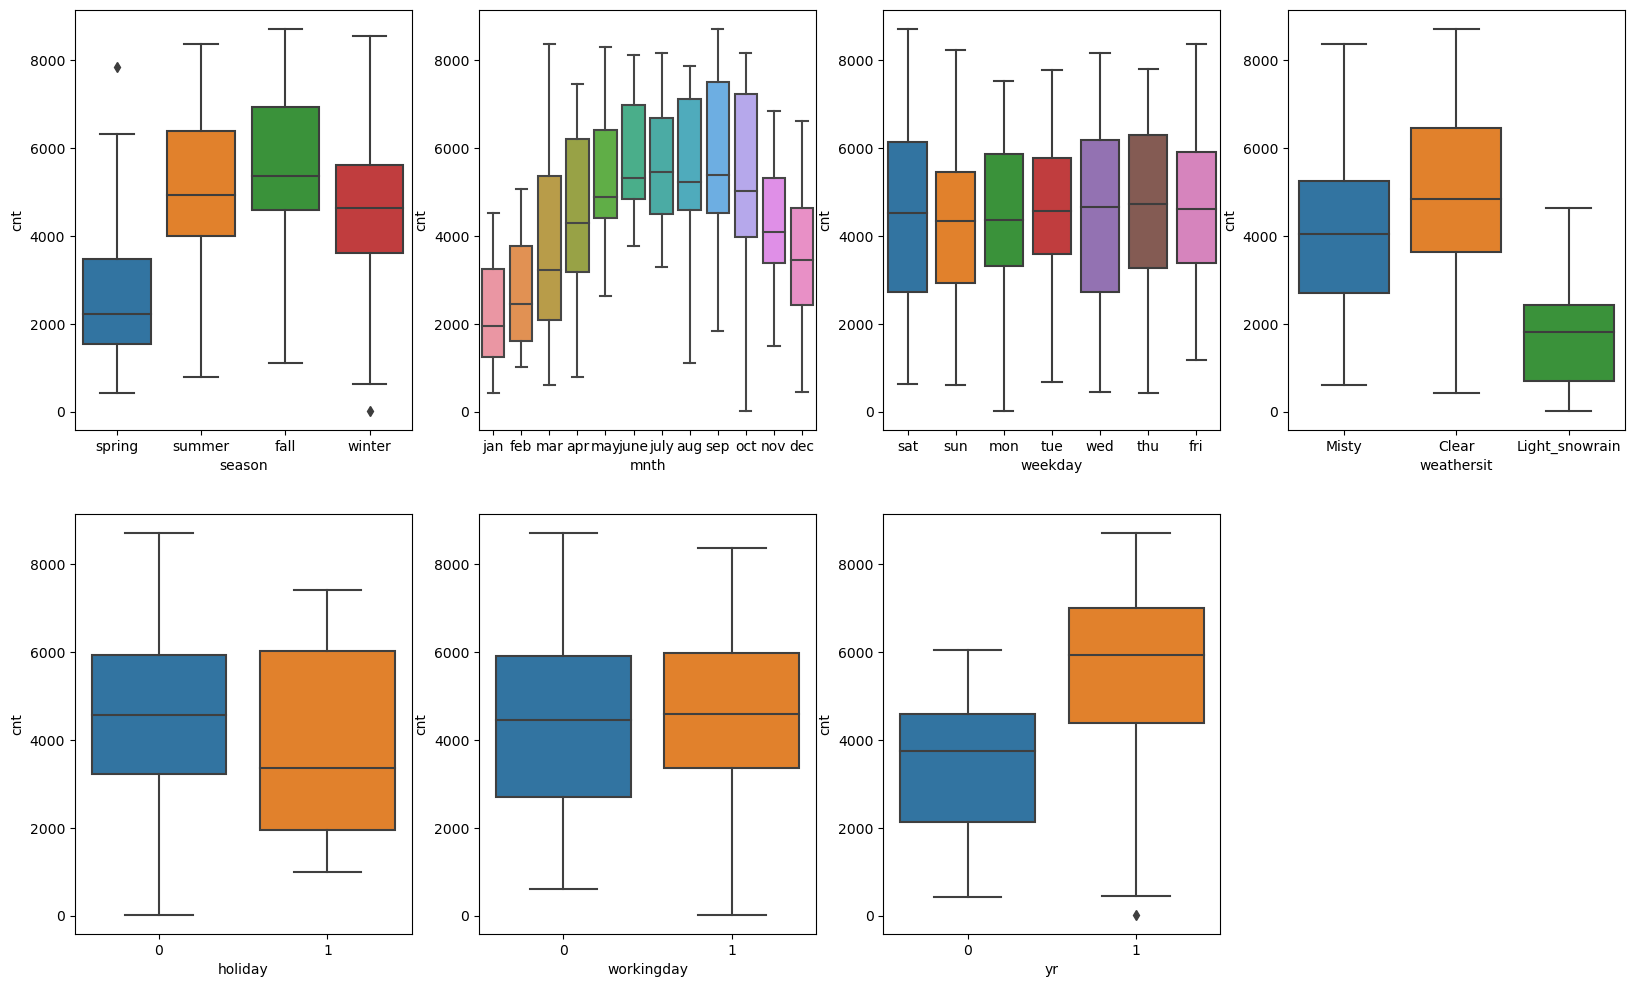

In [16]:
# Analysing/visualizing the categorical predictor variables against the target variable


plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = dataframe)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = dataframe)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = dataframe)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = dataframe)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = dataframe)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = dataframe)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = dataframe)
plt.show()

In [17]:
# function to create barplot 

def plot_barplot_for_variable(column):
    plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    sns.barplot(column,'cnt',data=dataframe)
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt',data=dataframe, hue='yr',palette='Set2')
    plt.legend(labels=['2018', '2019'])
    plt.show()

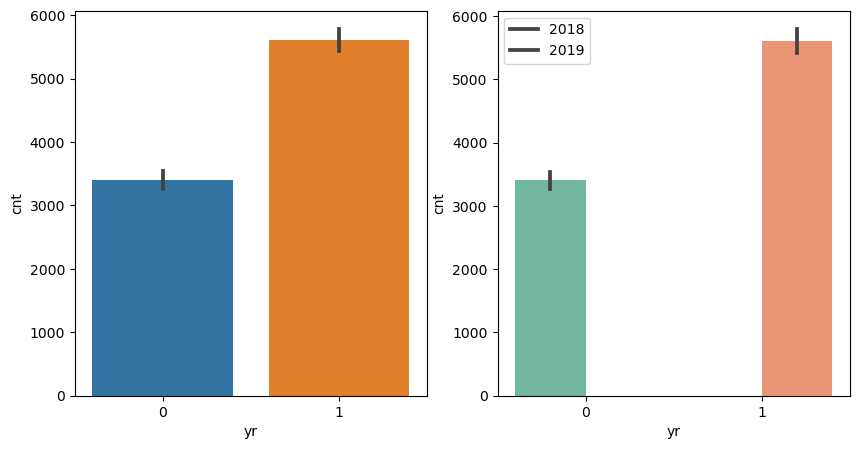

In [18]:

plot_barplot_for_variable('yr')

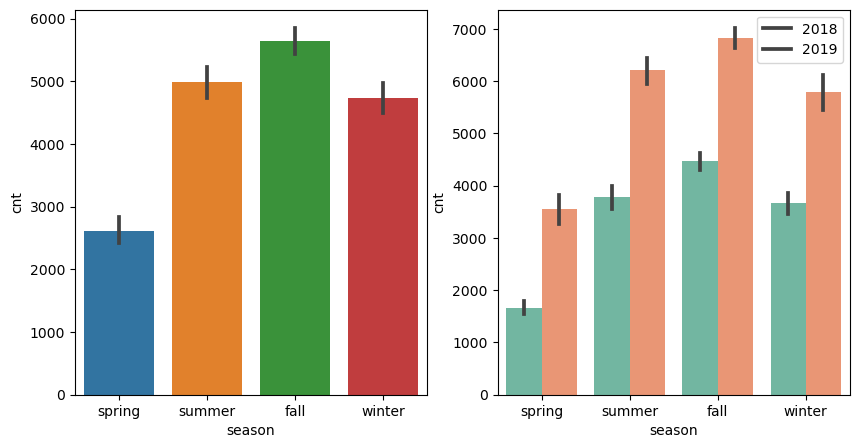

In [19]:
plot_barplot_for_variable('season')


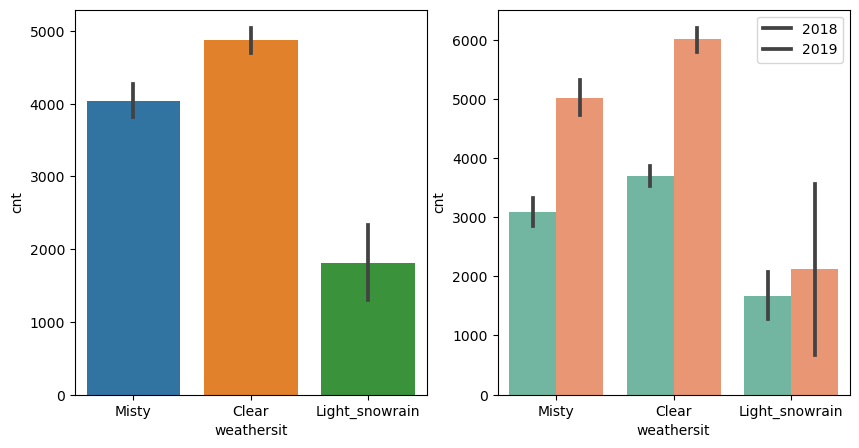

In [20]:
plot_barplot_for_variable('weathersit')

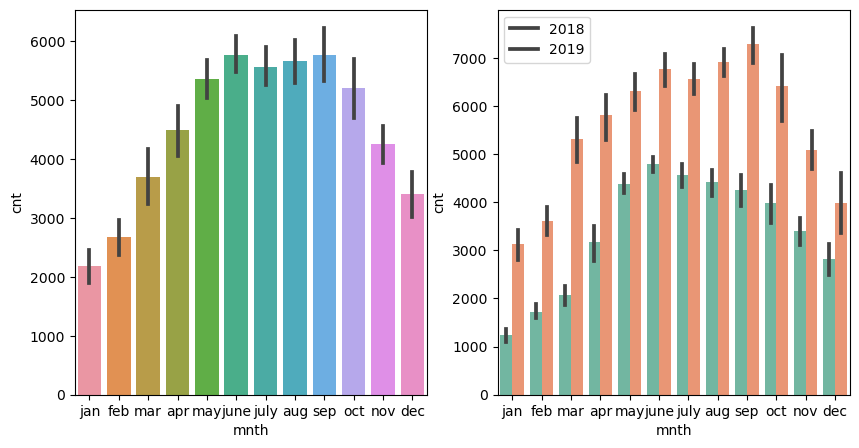

In [21]:
plot_barplot_for_variable('mnth')

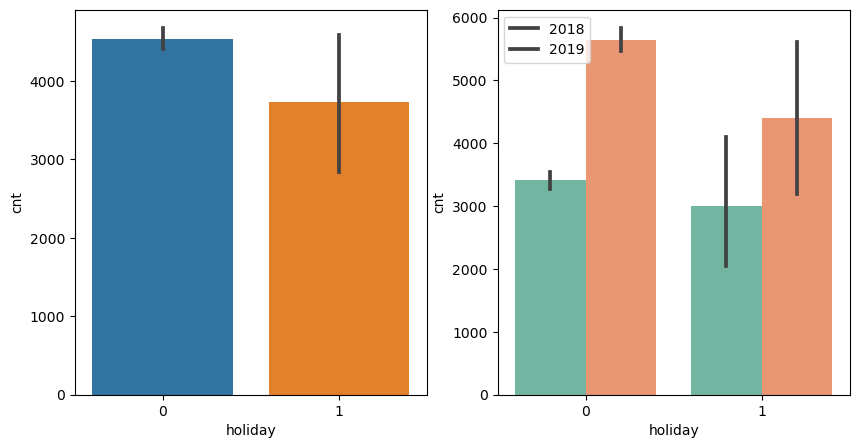

In [22]:
plot_barplot_for_variable('holiday')

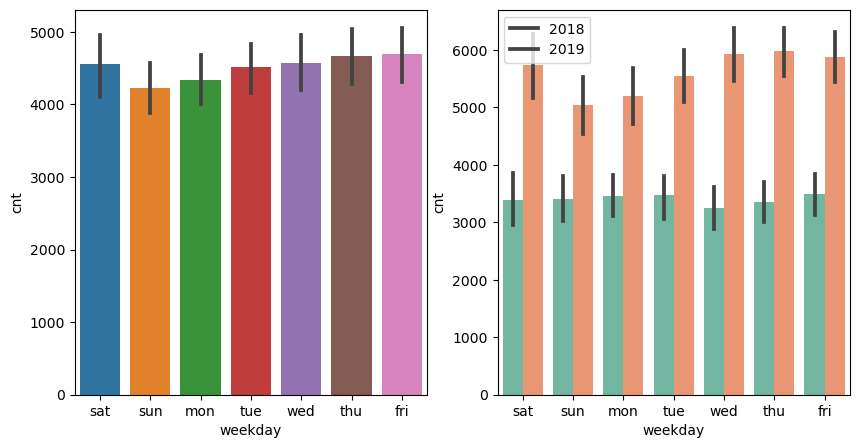

In [23]:
plot_barplot_for_variable('weekday')

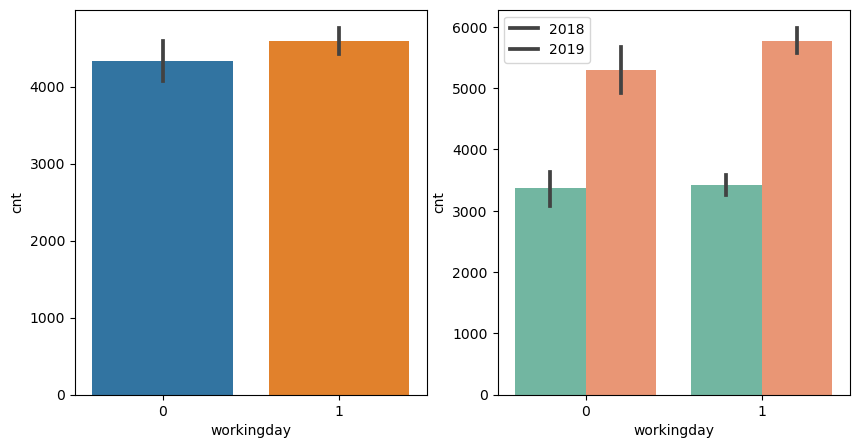

In [24]:
plot_barplot_for_variable('workingday')

Analysis : <br>
    $1$. There is significant rise in demand (cnt) from 2018 to 2019 <br>
    $2$. From may to october the demand is significantly high  <br>
    $3$. Demand does not vary on working day or weekend  <br>
    $4$. In holidays demand is significantly low compared to non-holidays <br>

## Data preperation

In [25]:
# Creating dummy variables for mapped columns month, weekday, weathersit and season variables.

mnths_dataframe=pd.get_dummies(dataframe.mnth,drop_first=True)
weekdays_dataframe=pd.get_dummies(dataframe.weekday,drop_first=True)
weathersit_dataframe=pd.get_dummies(dataframe.weathersit,drop_first=True)
seasons_dataframe=pd.get_dummies(dataframe.season,drop_first=True)

In [26]:
dataframe.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


Concatenating the newly created dummy variables to the actual dataframe

In [27]:
dataframe_new = pd.concat([dataframe,mnths_dataframe,weekdays_dataframe,weathersit_dataframe,seasons_dataframe],axis=1)

In [28]:
dataframe_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    uint8  
 13  dec             730 non-null    uint8  
 14  feb             730 non-null    uint8  
 15  jan             730 non-null    uint8  
 16  july            730 non-null    uint8  
 17  june            730 non-null    uin

In [29]:
# dropping the original columns since we have already mapped these values and concatenated them with original dataframe
dataframe_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [30]:
dataframe.shape


(730, 12)

In [31]:
dataframe_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    uint8  
 9   dec             730 non-null    uint8  
 10  feb             730 non-null    uint8  
 11  jan             730 non-null    uint8  
 12  july            730 non-null    uint8  
 13  june            730 non-null    uint8  
 14  mar             730 non-null    uint8  
 15  may             730 non-null    uint8  
 16  nov             730 non-null    uint8  
 17  oct             730 non-null    uin

# Linear Regression analysis

## Split the data into training and test sets

In [32]:
# split the data into test and train set with 70%-30% ratio

np.random.seed(0)
dataframe_train, dataframe_test = train_test_split(dataframe_new, train_size = 0.7, random_state = 100)

In [33]:
dataframe_test.shape

(220, 30)

In [34]:
dataframe_train.shape

(510, 30)

In [35]:
dataframe_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,0,0,0,0,0,1,0,1,0


In [36]:
# applying min_max scaler {excluding dummy variables}
# Transform features by scaling each feature to a given range.

scaler = MinMaxScaler()
num_vars = ['temp','atemp','hum','windspeed','cnt']
dataframe_train[num_vars] = scaler.fit_transform(dataframe_train[num_vars])
dataframe_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


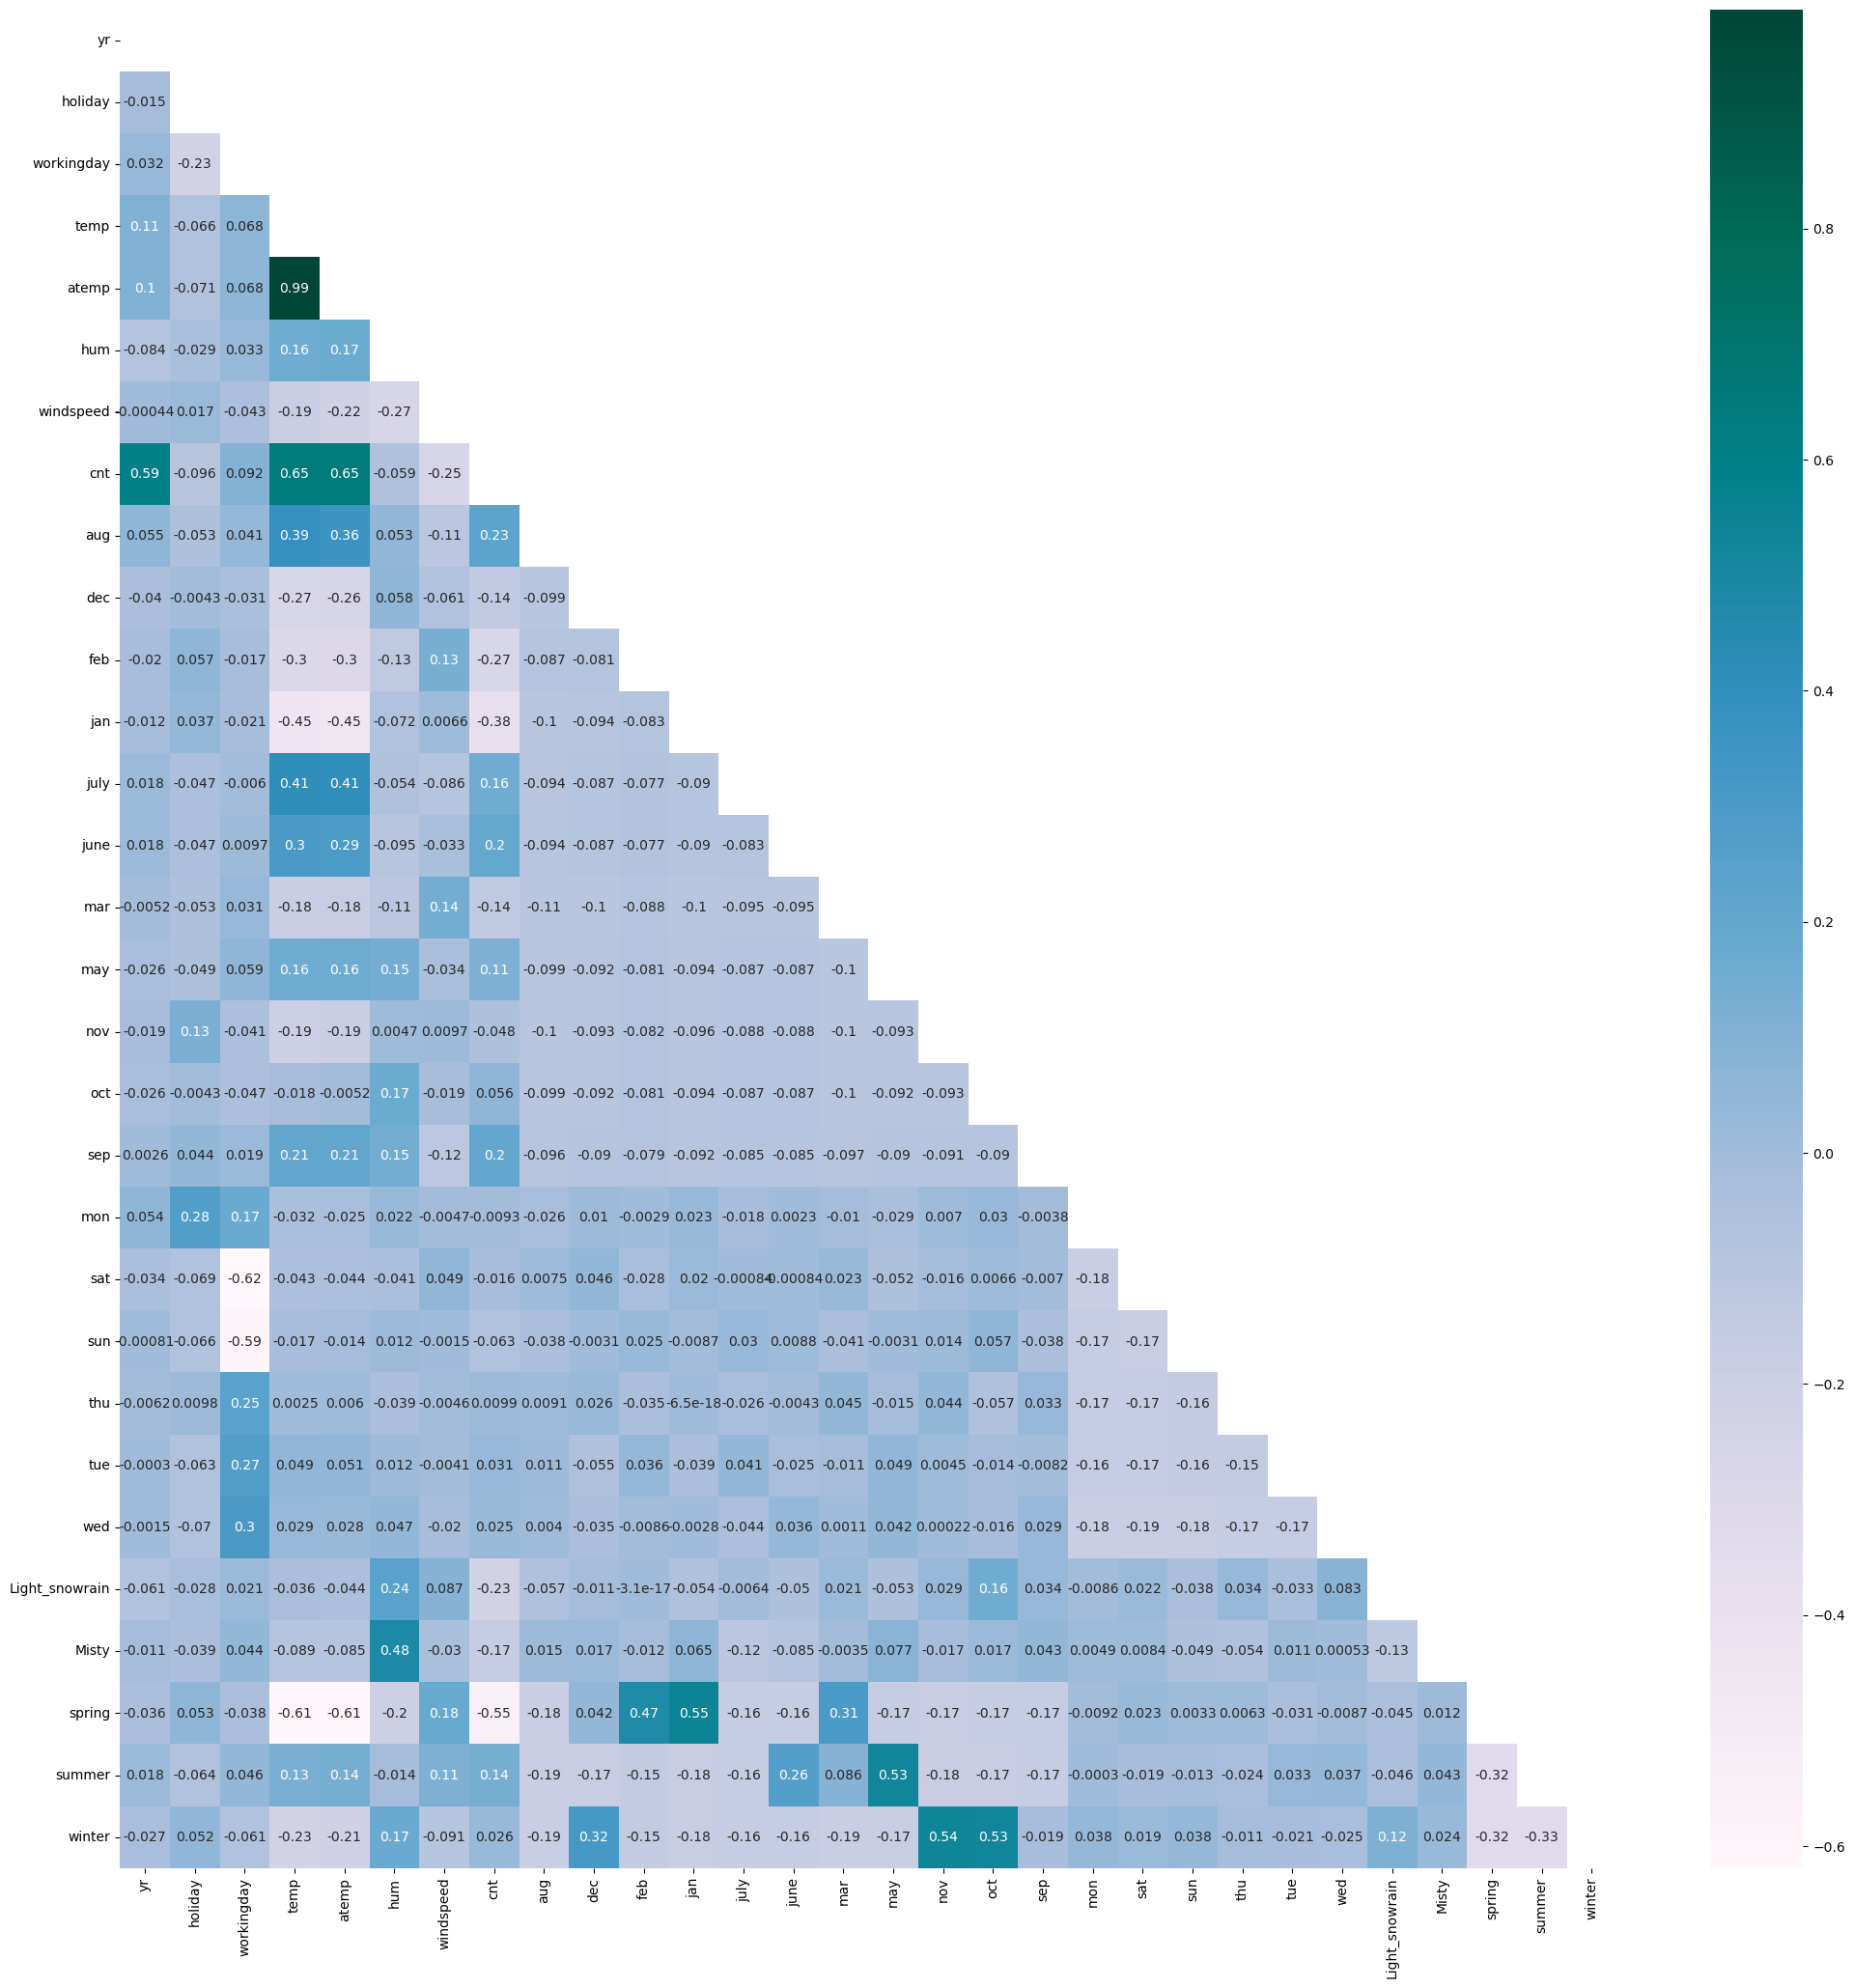

In [37]:
# check which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(dataframe_train.corr())
sns.heatmap(dataframe_train.corr(), annot = True, cmap="PuBuGn", mask=matrix)
plt.show()

Analysis :  <br>
$1$. cnt seems to have correlation with yr, temp and atemp <br>
$2$. summer shows correlation with may month <br>
$3$. winter shows correlation with nov, oct  <br>
$4$. misty and hum shows correlation 

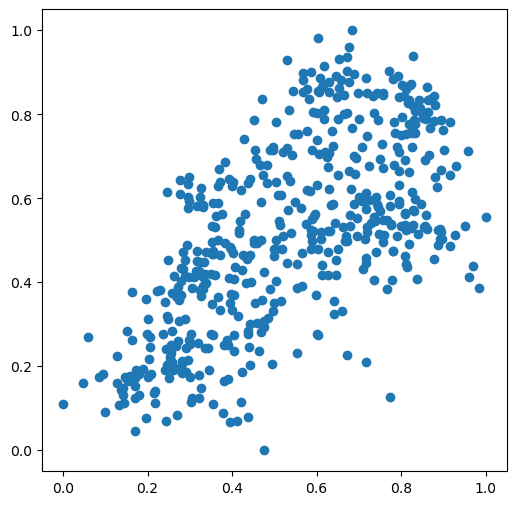

In [38]:
# Visualizing using Scatter plot

plt.figure(figsize=[6,6])
plt.scatter(dataframe_train.temp, dataframe_train.cnt)
plt.show()

In [39]:
y_train = dataframe_train.pop('cnt')
X_train = dataframe_train

In [40]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [41]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 12),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 11),
 ('may', False, 6),
 ('nov', False, 3),
 ('oct', False, 9),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 10),
 ('tue', False, 7),
 ('wed', False, 13),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', False, 15),
 ('winter', True, 1)]

In [42]:
col = X_train.columns[rfe.support_]
print(col)


Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'july', 'sep', 'sat', 'sun', 'Light_snowrain', 'Misty', 'spring',
       'winter'],
      dtype='object')


In [43]:
X_train.columns[~rfe.support_]

Index(['aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'nov', 'oct', 'mon',
       'thu', 'tue', 'wed', 'summer'],
      dtype='object')

In [44]:
#  The variance inflation factor (VIF) is a measure of multicollinearity in a multiple regression model
# Function to calculate VIF

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [45]:
# dataframe with RFE selected variables and calculate VIF on it

X_train_rfe = X_train[col]
calculateVIF(X_train_rfe)

,Features,VIF
3,temp,52.82
4,atemp,51.48
2,workingday,40.81
9,sat,9.96
10,sun,9.67
13,spring,2.55
1,holiday,2.54
5,hum,1.90
14,winter,1.79
12,Misty,1.57


## Building linear model 

In [46]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.1
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          8.89e-189
Time:                        00:59:50   Log-Likelihood:                 511.35
No. Observations:                 510   AIC:                            -992.7
Df Residuals:                     495   BIC:                            -929.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2422      0.025      9.

In [47]:
# VIF value for atemp is high so we will drop it
X_train_new = X_train_rfe.drop(['atemp'], axis = 1)

# Re-calculate the vif
calculateVIF(X_train_new)

,Features,VIF
2,workingday,40.65
8,sat,9.92
9,sun,9.64
3,temp,2.99
12,spring,2.55
1,holiday,2.54
4,hum,1.89
13,winter,1.78
11,Misty,1.57
6,july,1.30


In [48]:
# 2nd linear regression model

X_train_lin_model_2 = sm.add_constant(X_train_new)
lin_reg_2 = sm.OLS(y_train,X_train_lin_model_2).fit()
print(lin_reg_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          9.38e-190
Time:                        00:59:52   Log-Likelihood:                 510.91
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     496   BIC:                            -934.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2435      0.025      9.

In [49]:
# We can drop workingday variable as it has high VIF value
X_train_new = X_train_new.drop(['workingday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,hum,22.65
2,temp,15.31
4,windspeed,4.06
11,spring,2.55
10,Misty,2.25
12,winter,2.10
0,yr,2.06
5,july,1.40
7,sat,1.23
8,sun,1.23


In [50]:
# 3rd linear regression model

X_train_lin_model_3 = sm.add_constant(X_train_new)
lin_reg_3 = sm.OLS(y_train,X_train_lin_model_3).fit()
print(lin_reg_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          9.38e-190
Time:                        00:59:54   Log-Likelihood:                 510.91
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     496   BIC:                            -934.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3383      0.031     10.

In [51]:
# We can drop hum variable as it has high VIF
X_train_new = X_train_new.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.73
3,windspeed,4.04
0,yr,2.06
10,spring,1.68
9,Misty,1.52
11,winter,1.43
4,july,1.35
6,sat,1.23
7,sun,1.21
5,sep,1.20


In [52]:
# 4th linear regression model

X_train_lin_model_4 = sm.add_constant(X_train_new)
lin_reg_4 = sm.OLS(y_train,X_train_lin_model_4).fit()
print(lin_reg_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.3
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          1.26e-187
Time:                        00:59:56   Log-Likelihood:                 503.06
No. Observations:                 510   AIC:                            -980.1
Df Residuals:                     497   BIC:                            -925.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2587      0.024     10.

In [53]:
# We can drop sat variable as it has high p-value
X_train_new = X_train_new.drop(['sat'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.67
3,windspeed,4.01
0,yr,2.06
9,spring,1.66
8,Misty,1.52
10,winter,1.41
4,july,1.35
5,sep,1.20
6,sun,1.18
7,Light_snowrain,1.08


In [54]:
# 5th linear regression model

X_train_lin_model_5 = sm.add_constant(X_train_new)
lin_reg_5 = sm.OLS(y_train,X_train_lin_model_5).fit()
print(lin_reg_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.6
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          1.32e-188
Time:                        00:59:57   Log-Likelihood:                 502.54
No. Observations:                 510   AIC:                            -981.1
Df Residuals:                     498   BIC:                            -930.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2608      0.024     11.

# Residual Analysis

In [55]:
X_train_lin_model_5
y_train_pred = lin_reg_5.predict(X_train_lin_model_5)


## Normality of error 


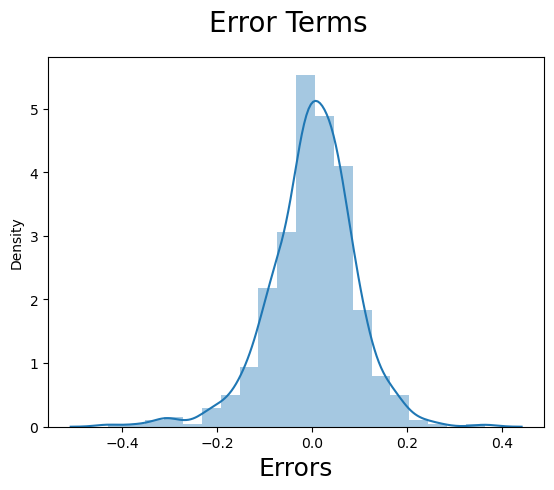

In [56]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)
plt.show()

In [57]:
calculateVIF(X_train_new)


,Features,VIF
2,temp,4.67
3,windspeed,4.01
0,yr,2.06
9,spring,1.66
8,Misty,1.52
10,winter,1.41
4,july,1.35
5,sep,1.20
6,sun,1.18
7,Light_snowrain,1.08


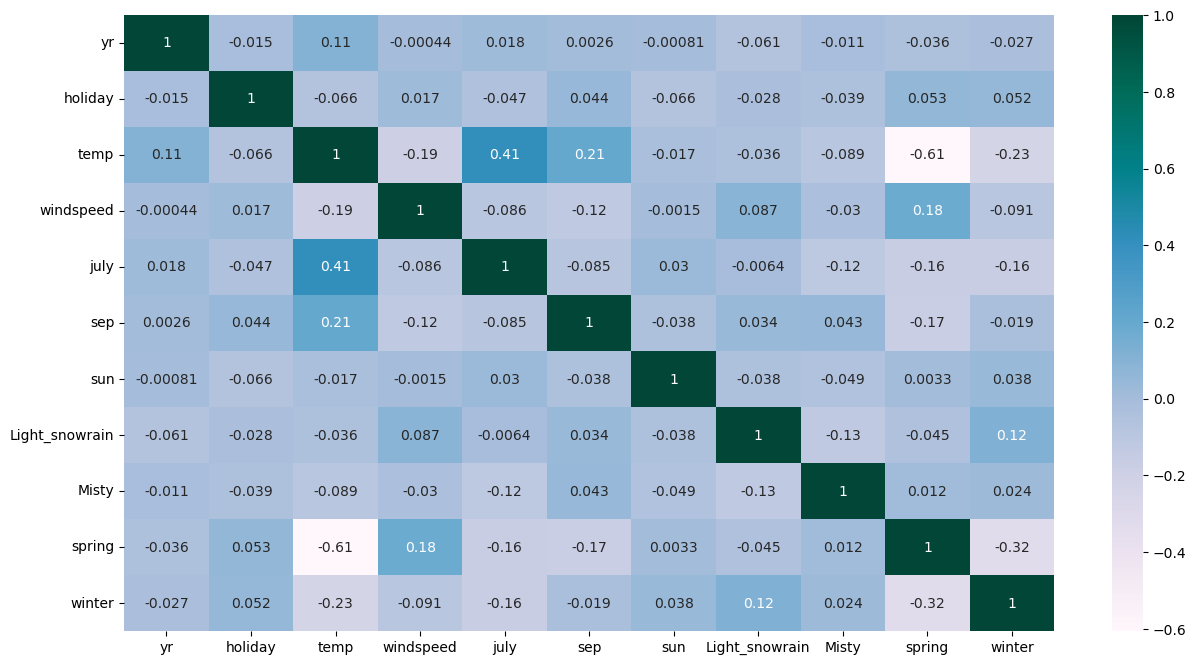

In [58]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="PuBuGn")
plt.show()

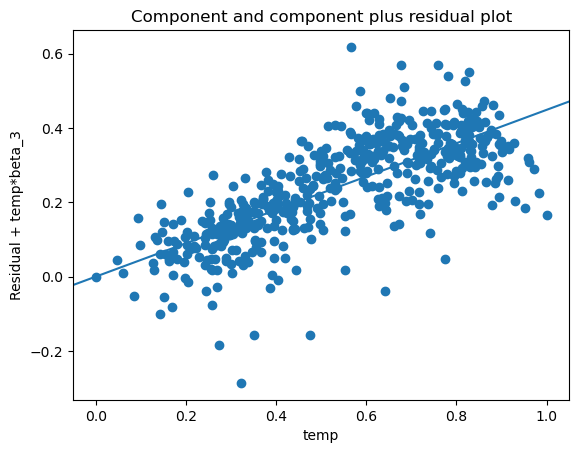

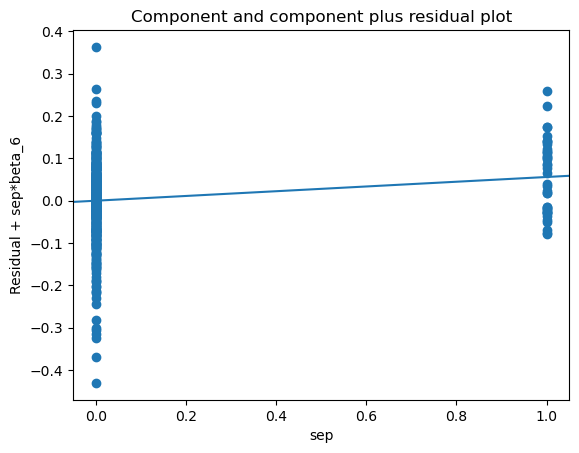

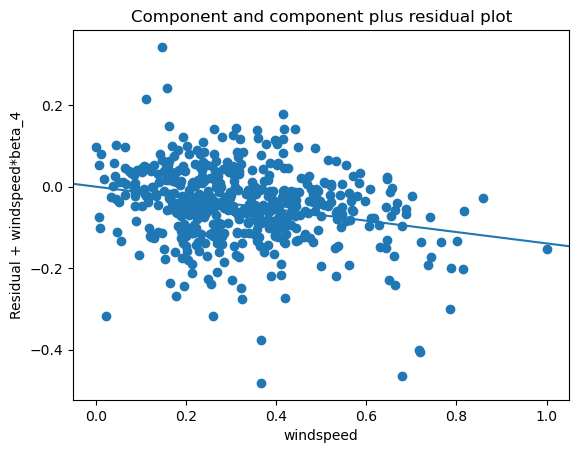

In [59]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lin_reg_5, 'temp')
plt.show()

sm.graphics.plot_ccpr(lin_reg_5, 'sep')
plt.show()

sm.graphics.plot_ccpr(lin_reg_5, 'windspeed')
plt.show()

### Homoscedasticity

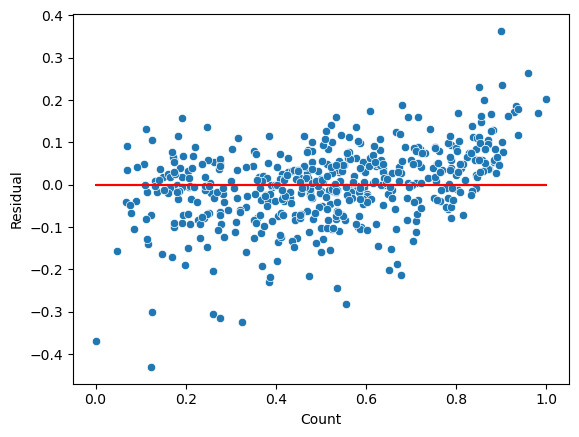

In [60]:
y_train_pred = lin_reg_5.predict(X_train_lin_model_5)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

# Making predictions using the final model (5th model)



In [61]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
dataframe_test[num_vars] = scaler.transform(dataframe_test[num_vars])
dataframe_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [62]:
dataframe_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:

y_test = dataframe_test.pop('cnt')
X_test = dataframe_test
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lin_model_5 = sm.add_constant(X_test)
y_pred = lin_reg_5.predict(X_test_lin_model_5)
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8104

# Model Evaluation


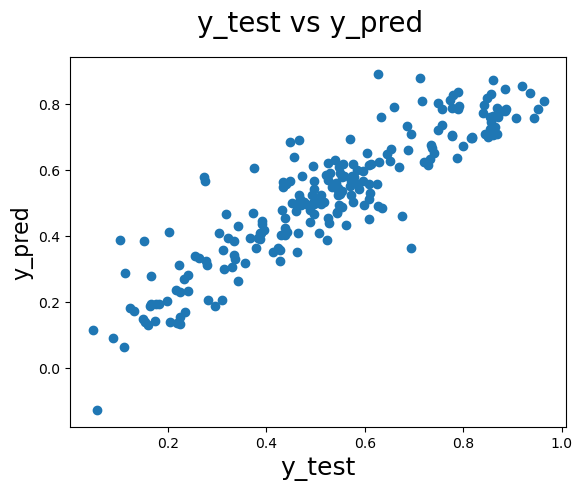

In [64]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [65]:
round(lin_reg_5.params,4)

const             0.2608
yr                0.2342
holiday          -0.1057
temp              0.4486
windspeed        -0.1393
july             -0.0706
sep               0.0561
sun              -0.0477
Light_snowrain   -0.2907
Misty            -0.0816
spring           -0.1117
winter            0.0471
dtype: float64

In [66]:
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.8004


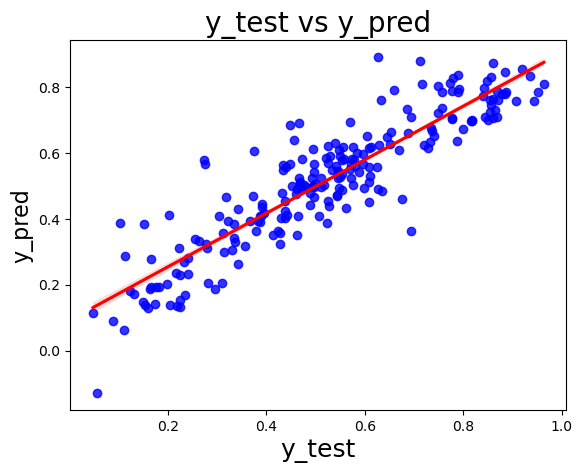

In [67]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

## Training and Testing dataset comparisions:


- Train dataset R squared          :   0.838 <br>
- Test dataset R squared           :   0.8104 <br>
- Train dataset Adjusted R squared :   0.834    <br>
- Test dataset Adjusted R squred   :   0.8004 <br>

Analysis : Demand of bikes depend on year, holiday, temp, windspeed, sep, Light_snowrain, Misty, spring and winter.